#***Just a miscellaneous set of excersizes of ML***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.impute import SimpleImputer
mat_1 = [[753, 1622, 3193], [np.nan, np.nan, 1966], [1200, 5, np.nan],[981, np.nan,
9211]]
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
print("Mean Strategy :",imputer.fit_transform(mat_1))
imputer_2 = SimpleImputer(missing_values = np.nan, strategy = "median")
print("Median Strategy :",imputer_2.fit_transform(mat_1))

Mean Strategy : [[7.530e+02 1.622e+03 3.193e+03]
 [9.780e+02 8.135e+02 1.966e+03]
 [1.200e+03 5.000e+00 4.790e+03]
 [9.810e+02 8.135e+02 9.211e+03]]
Median Strategy : [[7.530e+02 1.622e+03 3.193e+03]
 [9.810e+02 8.135e+02 1.966e+03]
 [1.200e+03 5.000e+00 3.193e+03]
 [9.810e+02 8.135e+02 9.211e+03]]


In [3]:
from sklearn.preprocessing import FunctionTransformer
mat_2 = [[0, 1], [2, 3],[10,100]]
transformer = FunctionTransformer(func=np.log10,validate = False)
print(transformer.fit_transform(mat_2))

[[      -inf 0.        ]
 [0.30103    0.47712125]
 [1.         2.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: RuntimeWarning: divide by zero encountered in log10
  return func(X, **(kw_args if kw_args else {}))


<Axes: ylabel='Density'>

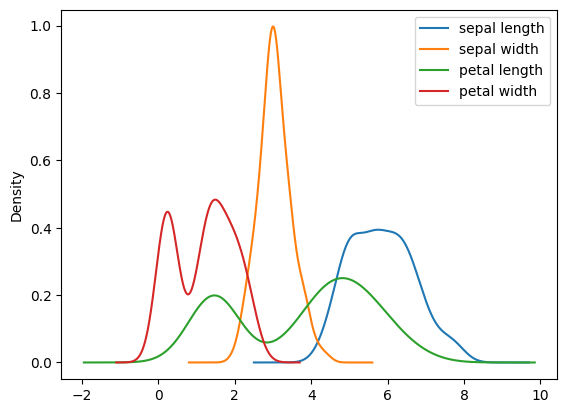

In [4]:
columns = ['sepal length','sepal width','petal length','petal width','label']
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names= columns)
data.plot.kde()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

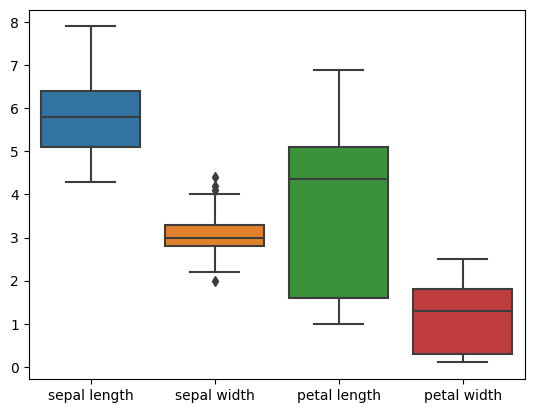

In [6]:
sns.boxplot(data)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2)
new_mat = transformer.fit_transform(data[data.columns[:4]])
print(new_mat.shape)

(150, 15)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories="auto")
new_matrix = enc.fit_transform(data.label.values.reshape(-1,1))
print(new_matrix.shape)
print(new_matrix[45:55])

(150, 3)
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0


In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
import pandas as pd

# Load the California housing dataset
X, y = fetch_california_housing(return_X_y=True)
feature_names = fetch_california_housing().feature_names

# Create a DataFrame from the features
df = pd.DataFrame(X, columns=feature_names)

# Perform feature selection using SelectPercentile and mutual_info_regression
selector = SelectPercentile(percentile=10, score_func=mutual_info_regression)
new_df = selector.fit_transform(X, y)
print(df.shape)
print(new_df.shape)

(20640, 8)
(20640, 1)


***Model Building:***

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

Df = pd.read_csv("/content/Model_Building_1 (2).csv")
print(Df.shape)
print(Df.info())
Df.head()

(10000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Locality_Bridgeport         10000 non-null  float64
 1   Locality_Fairfield          10000 non-null  float64
 2   Locality_Greenwich          10000 non-null  float64
 3   Locality_Norwalk            10000 non-null  float64
 4   Locality_Stamford           10000 non-null  float64
 5   Locality_Waterbury          10000 non-null  float64
 6   Locality_West Hartford      10000 non-null  float64
 7   Property_Four Family        10000 non-null  float64
 8   Property_Single Family      10000 non-null  float64
 9   Property_Three Family       10000 non-null  float64
 10  Property_Two Family         10000 non-null  float64
 11  Residential_Detached House  10000 non-null  float64
 12  Residential_Duplex          10000 non-null  float64
 13  Residential_Fourplex

,Locality_Bridgeport,Locality_Fairfield,Locality_Greenwich,Locality_Norwalk,Locality_Stamford,Locality_Waterbury,Locality_West Hartford,Property_Four Family,Property_Single Family,Property_Three Family,...,Face_North,Face_South,Face_West,Year,Estimated Value,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Sale Price
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.013548,0.0,0.142857,0.060316,0.013981,5187000.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.013548,0.0,0.142857,0.072283,0.013981,480000.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.003405,0.0,0.142857,0.020584,0.013981,152000.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.002618,0.0,0.142857,0.095261,0.013981,60000.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.005356,0.2,0.142857,0.149832,0.013981,250000.0


In [12]:
X_train = Df.drop('Sale Price',axis=1)[:8271]
X_test = Df.drop('Sale Price',axis = 1)[8271:]
y_train = Df['Sale Price'][:8271]
y_test = Df['Sale Price'][8271:]

regressor = LinearRegression()
model_1= regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(f"The R2 score for Linear regression is {r2}")

The R2 score for Linear regression is 0.6487187820501275


In [13]:
cv_score = cross_val_score(regressor,X_train,y_train,cv = 5,scoring='r2')
cv_score.max()

0.8145534279480245

In [14]:
lasso_estimator = Lasso(random_state = 27)
ridge_estimator = Ridge(random_state = 27)
model_2 = lasso_estimator.fit(X_train,y_train)
model_3 = ridge_estimator.fit(X_train,y_train)
y1_pred = lasso_estimator.predict(X_test)
y2_pred = ridge_estimator.predict(X_test)

error1 = mean_squared_error(y_test,y1_pred)
error2 = mean_squared_error(y_test,y2_pred)
print(f"Lasso error: {error1}")
print(f"Ridge error: {error2}")

from sklearn.linear_model import SGDRegressor
regressor_2 = SGDRegressor(random_state=27,warm_start = True, max_iter=100)
model_4 = regressor_2.fit(X_train,y_train)
y_pred_sgd = regressor_2.predict(X_test)
r2_e = r2_score(y_test,y_pred_sgd)
print(f"SGD R2 Error: {r2_e}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.077e+14, tolerance: 1.091e+12
  model = cd_fast.enet_coordinate_descent(


Lasso error: 305679973171.04114
Ridge error: 301826722452.76605
SGD R2 Error: 0.526637137705182


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
pipe_01 = Pipeline([('transformer',PolynomialFeatures(interaction_only = True,)),('estimator',Lasso())])
parameters = {
    'estimator__alpha':[10,100,1000,10000],
    'transformer__degree':[1,2]
}
grid_cv_model = GridSearchCV(estimator = pipe_01,param_grid = parameters,scoring = 'neg_mean_absolute_error',cv = 5, n_jobs = -1)
grid_cv_model.fit(X_train, y_train)
print("The best Parameters are: ",grid_cv_model.best_params_)

The best Parameters are:  {'estimator__alpha': 1000, 'transformer__degree': 1}


In [16]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 13,svd_solver = 'full',whiten = True,random_state = 27)
model_6 = pca_model.fit(X_train,y_train)
X_train_pca = pca_model.fit_transform(X_train)
print(model_6.explained_variance_ratio_.sum())

0.9703998473326341


In [17]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas= [0.1,1,10,100,1000,10000],cv = 5)
model_combined = ridge.fit(X_train_pca,y_train)
X_test_pca = pca_model.transform(X_test)
y_test_predd = model_combined.predict(X_test_pca)
r2_combined = r2_score(y_test,y_test_predd)
r2_combined

0.29638538820932236

In [27]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
y = data.target
df_02 = pd.DataFrame(X,columns = data.feature_names)
print("Before Selection:",df_02.shape)

from sklearn.feature_selection import SelectPercentile, mutual_info_regression
transformer = SelectPercentile(score_func=mutual_info_regression,percentile= 10)
df_03 = transformer.fit_transform(X,y)
print("After Selection:",df_03.shape)

Before Selection: (20640, 8)
After Selection: (20640, 1)


In [35]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

num_pipe = Pipeline([('selector',ColumnTransformer([('fantastic_4','passthrough',slice(0,4))])),('imputer',SimpleImputer(strategy = 'mean')),('scaler',StandardScaler())])
cat_pipe = ColumnTransformer([('binarizer',LabelBinarizer,[4])])

combined_pipe = FeatureUnion([('num_pipe',num_pipe),('cat_pipe',cat_pipe)])
from sklearn import set_config
set_config(display='diagram')
# displays HTML representation in a jupyter context
combined_pipe

FeatureUnion(transformer_list=[('num_pipe',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('fantastic_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer', SimpleImputer()),
                                                ('scaler', StandardScaler())])),
                               ('cat_pipe',
                                ColumnTransformer(transformers=[('binarizer',
                                                                 <class 'sklearn.preprocessing._label.LabelBinarizer'>,
                                                                 [4])]))])